## 1. Why Databases?

- Aim : get a short introduction into using databases and using databases with python

- Dutch Vegetation Database

![](https://github.com/komazsofi/usingdatabases/blob/master/figures/db.PNG?raw=true)

- Tasks: 
	* ask all the observation which was observed on a selected location
	* calculate species richness
	* find all the information where English oak (Quercus robur) is presented
	* how many observation per habitats is exist


## 2. Basic SQL queries (PostgreSQL - pgAdmin)

- ask all the observation which was observed on a selected location

```sql
select * from observation
where observation.polygonid=100;
```

```sql
select * from observation
LEFT JOIN species ON species.species_id=observation.specieskey
where observation.polygonid=100;
```

- calculate species richness

```sql
select specieskey,count(specieskey) into speciesrichness from observation 
group by specieskey;
```

```sql
select * from speciesrichness
LEFT JOIN species ON species.species_id=speciesrichness.specieskey
```

- find all the information where English oak (Quercus robur) is presented

```sql
select * into speciesinfotoobservation from observation
LEFT JOIN species ON species.species_id=observation.specieskey
```

```sql
select * from speciesinfotoobservation 
where speciesinfotoobservation.species='Quercus robur';
```

- how many observation per habitats is exist

```sql
select habitat,count(polygonid) from plot
group by habitat
```


## 3. How to handle a database within python?

In [5]:
import psycopg2 as dbapi2
import numpy as np
import pandas as pd

db = dbapi2.connect(host="localhost", database="postgres", user="user", password="local")
cur = db.cursor()
cur.execute("select * from observation where observation.polygonid=100");
result = cur.fetchall()
cur.close()
db.close()

print(len(result))

38


In [6]:
result_asarray=np.array(result)
print(result_asarray.shape)

(38L, 4L)


In [8]:
import psycopg2 as dbapi2
import numpy as np

def db_connect(sqlcommand,host="localhost", database="postgres", user="user", password="local"):

    """
    Connect to the database 
    """

    db = dbapi2.connect(host=host, database=database, user=user, password=password)
    cur = db.cursor()

    cur.execute(sqlcommand);

    result = cur.fetchall()

    cur.close()
    db.close()

    return np.array(result)

result=db_connect("select * from observation where observation.polygonid=100")
print(len(result))

38


## 4. Direct visualization

In [13]:
habitats=db_connect("select habitat,count(polygonid) from plot group by habitat")
print(habitats)

print(habitats[:,1].astype(np.float))

[['Open water' '651']
 ['Grassland (not salty)' '4974']
 ['Forest' '2151']
 ['Brushwood' '859']
 ['Wet pionier environment' '488']
 ['Dry disturbed environment' '751']
 ['Saltmarch' '1711']
 ['Heathland' '1155']
 ['Marsh' '1353']
 ['Fringes & tall forb vegetation' '1575']]
[  651.  4974.  2151.   859.   488.   751.  1711.  1155.  1353.  1575.]


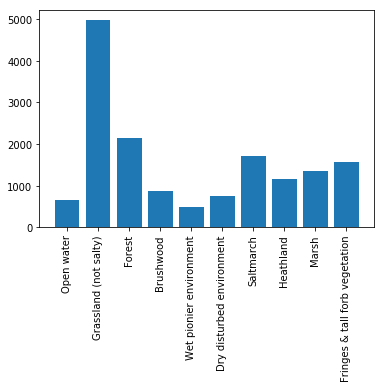

In [15]:
import matplotlib.pyplot as plt

y_pos = np.arange(len(habitats[:,0]))

plt.bar(y_pos, habitats[:,1].astype(np.float))
plt.xticks(y_pos, habitats[:,0],rotation='vertical')
plt.show()